In [77]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
path_1="D:\data\PPG_FieldStudy\S1/S1.pkl"
path_2="D:\data\PPG_FieldStudy\S2/S2.pkl"
path_3="D:\data\PPG_FieldStudy\S3/S3.pkl"
path_4="D:\data\PPG_FieldStudy\S4/S4.pkl"
path_5="D:\data\PPG_FieldStudy\S5/S5.pkl"
path_6="D:\data\PPG_FieldStudy\S6/S6.pkl"
path_7="D:\data\PPG_FieldStudy\S7/S7.pkl"
path_8="D:\data\PPG_FieldStudy\S8/S8.pkl"
path_9="D:\data\PPG_FieldStudy\S9/S9.pkl"
path_10="D:\data\PPG_FieldStudy\S10/S10.pkl"
path_11="D:\data\PPG_FieldStudy\S11/S11.pkl"
path_12="D:\data\PPG_FieldStudy\S12/S12.pkl"
path_13="D:\data\PPG_FieldStudy\S13/S13.pkl"
path_14="D:\data\PPG_FieldStudy\S14/S14.pkl"
path_15="D:\data\PPG_FieldStudy\S15/S15.pkl"

In [5]:
with open(path_1, "rb") as f:
    data = pickle.load(f,encoding ="latin-1")

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [6]:
pd.DataFrame(data)


ValueError: arrays must all be same length

In [7]:
d = pd.read_pickle("D:\data\PPG_FieldStudy\S1/S1.pkl")

In [8]:
d.keys() 

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [9]:
df1=pd.DataFrame(d["signal"])

In [10]:
df1

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN


In [12]:
#méthode du cours
df1  = []
pbms = []
oks  = []
for i in data.keys():
    try:
        df = pd.DataFrame(data[i]) 
        df1.append(df)
        oks.append(i)
    except Exception as e:
        pbms.append(i + str(e))
print(f"clefs ok = {oks}")
print(f"clefs avec un pbms = {pbms}")

clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']


In [13]:
df1

[             0
 0          240
 1         1174
 2         2128
 3         3099
 4         3907
 5         4733
 6         5404
 7         6382
 8         7231
 9         7950
 10        8696
 11        9351
 12       10047
 13       10780
 14       11476
 15       12232
 16       13086
 17       13798
 18       14469
 19       15098
 20       15703
 21       16271
 22       16846
 23       17414
 24       17980
 25       18571
 26       19200
 27       19814
 28       20415
 29       21000
 ...        ...
 11401  6431888
 11402  6432588
 11403  6433271
 11404  6433950
 11405  6434566
 11406  6435193
 11407  6435904
 11408  6436629
 11409  6437263
 11410  6437888
 11411  6438561
 11412  6439223
 11413  6439830
 11414  6440396
 11415  6440922
 11416  6441437
 11417  6441933
 11418  6442433
 11419  6442934
 11420  6443436
 11421  6443942
 11422  6444435
 11423  6444915
 11424  6445399
 11425  6445868
 11426  6446343
 11427  6446825
 11428  6447292
 11429  6447748
 11430  6448224
 
 [1143

In [64]:
data = pd.read_pickle("D:\data\PPG_FieldStudy\S1/S1.pkl")
df3 = pd.DataFrame()
    #data cleaning, on ne garde que les attributs qui nous intéressent
del data['questionnaire']['Gender']
quest = data['questionnaire']
del data['questionnaire']
temp = pd.DataFrame(data["activity"], columns=['activity'])
for i,j in quest.items():
    temp[i] = j
    
curr = np.repeat(data["label"], 8)
diff = len(data["activity"])-len(curr)
for i in range(diff):
    curr = np.append(curr,curr[-1])
       
temp['Hrate'] = splitdata(curr,len(data['activity']))
temp['Rpeak'] = splitdata(np.asarray(rpeak),len(data['activity']))
temp['ACC'] = splitdata(data['signal']['chest']['ACC'],len(data['activity']))
temp['ACC'] = splitdata(data['signal']['wrist']['ACC'],len(data['activity']))
temp['BVP'] = splitdata(data['signal']['wrist']['BVP'],len(data['activity']))
temp['Resp'] = splitdata(data['signal']['chest']['Resp'],len(data['activity']))
temp['ECG'] = splitdata(data['signal']['chest']['ECG'],len(data['activity']))



df3 = df3.append(temp, ignore_index=True)

In [65]:
df3

,activity,WEIGHT,AGE,HEIGHT,SKIN,SPORT,Hrate,Rpeak,ACC,BVP,Resp,ECG
0,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.056641,0.138125,4.834438,0.035650
1,0.0,78.0,34,182.0,3,6,49.611369,0.005714,-0.056641,-26.262500,4.238839,0.103145
2,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.055990,-40.959375,2.058559,0.099101
3,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.053385,24.173125,-0.463981,-0.170757
4,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.055339,25.781250,-1.867397,-0.036633
5,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.056641,8.678125,-1.400373,0.027540
6,0.0,78.0,34,182.0,3,6,49.611369,0.005714,-0.052734,-17.215625,0.611511,0.119724
7,0.0,78.0,34,182.0,3,6,49.611369,0.000000,-0.054688,-35.286875,2.554940,0.134410
8,0.0,78.0,34,182.0,3,6,50.323992,0.000000,-0.052734,21.870000,2.310625,-0.212572
9,0.0,78.0,34,182.0,3,6,50.323992,0.000000,-0.054036,28.181250,0.124163,-0.074286


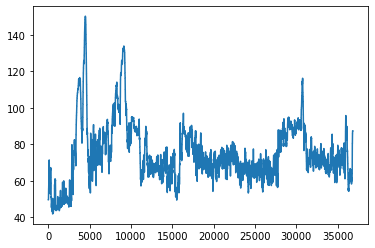

In [54]:
plt.plot(dffinal["label"])

In [66]:
y = df3['activity']
x = df3.drop(columns=['activity'])
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [73]:
tree = DecisionTreeClassifier()
tree.fit(x_Train, y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
prediction_tree = tree.predict(x_Test)
precision= precision_score(y_Test, prediction_tree, average='macro')
accuracy= accuracy_score(y_Test, prediction_tree)

In [76]:
print(f"Precision = {precision}")
print(f"Accuracy = {accuracy}")

Precision = 0.7045257831049713
Accuracy = 0.7451831750339213


In [78]:
rfc = RandomForestClassifier()
rfc.fit(x_Train, y_Train.values.ravel())

C:\Users\BENOIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
prediction = rfc.predict(x_Test)
precision = precision_score(y_Test, prediction, average='macro')
accuracy = accuracy_score(y_Test, prediction)

In [81]:
print(f"Precision = {precision}")
print(f"Accuracy = {accuracy}")

Precision = 0.7195834068499812
Accuracy = 0.7466757123473542


In [82]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_Train, y_Train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [83]:
A = neigh.kneighbors_graph(x_Train,y_Train)
A.toarray()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [86]:
data = pd.read_pickle("D:\data\PPG_FieldStudy\S1/S1.pkl")
df4 = pd.DataFrame()
    #data cleaning, on ne garde que les attributs qui nous intéressent
del data['questionnaire']['Gender']
quest = data['questionnaire']
del data['questionnaire']
temp = pd.DataFrame(data["activity"], columns=['activity'])
for i,j in quest.items():
    temp[i] = j
    
curr = np.repeat(data["label"], 8)
diff = len(data["activity"])-len(curr)
for i in range(diff):
    curr = np.append(curr,curr[-1])
temp['EDA'] = data['signal']['wrist']['EDA']
temp['TEMP'] = data['signal']['wrist']['TEMP']       
temp['Hrate'] = splitdata(curr,len(data['activity']))
temp['Rpeak'] = splitdata(np.asarray(rpeak),len(data['activity']))
temp['ACC'] = splitdata(data['signal']['chest']['ACC'],len(data['activity']))
temp['ACC'] = splitdata(data['signal']['wrist']['ACC'],len(data['activity']))
temp['BVP'] = splitdata(data['signal']['wrist']['BVP'],len(data['activity']))
temp['Resp'] = splitdata(data['signal']['chest']['Resp'],len(data['activity']))
temp['ECG'] = splitdata(data['signal']['chest']['ECG'],len(data['activity']))



df4 = df4.append(temp, ignore_index=True)

In [87]:
df4

,activity,WEIGHT,AGE,HEIGHT,SKIN,SPORT,EDA,TEMP,Hrate,Rpeak,ACC,BVP,Resp,ECG
0,0.0,78.0,34,182.0,3,6,4.722437,32.13,49.611369,0.000000,-0.056641,0.138125,4.834438,0.035650
1,0.0,78.0,34,182.0,3,6,4.728843,32.16,49.611369,0.005714,-0.056641,-26.262500,4.238839,0.103145
2,0.0,78.0,34,182.0,3,6,4.718594,32.16,49.611369,0.000000,-0.055990,-40.959375,2.058559,0.099101
3,0.0,78.0,34,182.0,3,6,4.717312,32.16,49.611369,0.000000,-0.053385,24.173125,-0.463981,-0.170757
4,0.0,78.0,34,182.0,3,6,4.713469,32.16,49.611369,0.000000,-0.055339,25.781250,-1.867397,-0.036633
5,0.0,78.0,34,182.0,3,6,4.712188,32.15,49.611369,0.000000,-0.056641,8.678125,-1.400373,0.027540
6,0.0,78.0,34,182.0,3,6,4.716032,32.15,49.611369,0.005714,-0.052734,-17.215625,0.611511,0.119724
7,0.0,78.0,34,182.0,3,6,4.704501,32.15,49.611369,0.000000,-0.054688,-35.286875,2.554940,0.134410
8,0.0,78.0,34,182.0,3,6,4.698095,32.15,50.323992,0.000000,-0.052734,21.870000,2.310625,-0.212572
9,0.0,78.0,34,182.0,3,6,4.700657,32.15,50.323992,0.000000,-0.054036,28.181250,0.124163,-0.074286


In [88]:
y = df4['activity']
x = df4.drop(columns=['activity'])
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [89]:
tree = DecisionTreeClassifier()
tree.fit(x_Train, y_Train)
prediction_tree = tree.predict(x_Test)
precision= precision_score(y_Test, prediction_tree, average='macro')
accuracy= accuracy_score(y_Test, prediction_tree)
print(f"Precision = {precision}")
print(f"Accuracy = {accuracy}")

Precision = 0.9916869628919294
Accuracy = 0.9906377204884668


In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_Train, y_Train.values.ravel())
prediction = rfc.predict(x_Test)
precision = precision_score(y_Test, prediction, average='macro')
accuracy = accuracy_score(y_Test, prediction)
print(f"Precision = {precision}")
print(f"Accuracy = {accuracy}")

C:\Users\BENOIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision = 0.9856118295994689
Accuracy = 0.9791044776119403
